<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/04.2-Probability-Distributions-Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Probability Distributions
Probability distributions describe the likelihood of different outcomes for a random event.

Here are a few ways to think about it:
* It's a comprehensive description of the possible values a random variable can take and the probabilities associated with each of these values.
* It can be viewed as a complete list of all potential outcomes, along with their respective probabilities.
* Probability distributions offer a visual representation of all possible events and the probability of each occurring.


## Normal Distribution
A normal distribution is a continuous probability distribution that is shaped like a bell curve that best describes the strength of possible beliefs in the the value of an uncertain measurement, given a known mean and standard deviation.


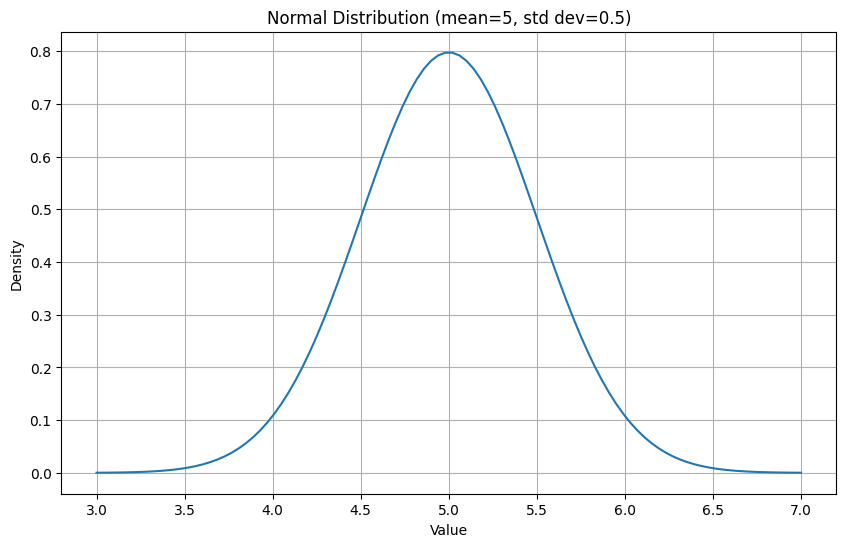

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 5
std_dev = 0.5

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100) # Generate x-values around the mean

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Normal Distribution (mean={mean}, std dev={std_dev})")
plt.grid(True)

# Display the plot
plt.show()


*  The peak of the distribution is centered around the mean. The spread of the distribution is controlled by the standard deviation
*  The distribution is shown with a smooth curve instead of discrete bars.
* The area under the curve always equals 1  
* The y axis is labeled density because the normal pdf returns a probability density instead of an actual probability

The Probability Density Function (PDF) for a normal distribution is given by:
$$f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

Where:

* x is the random variable
* μ (mu) is the mean of the distribution
* σ (sigma) is the standard deviation of the distribution
* π (pi) ≈ 3.14159
* e is Euler's number ≈ 2.71828




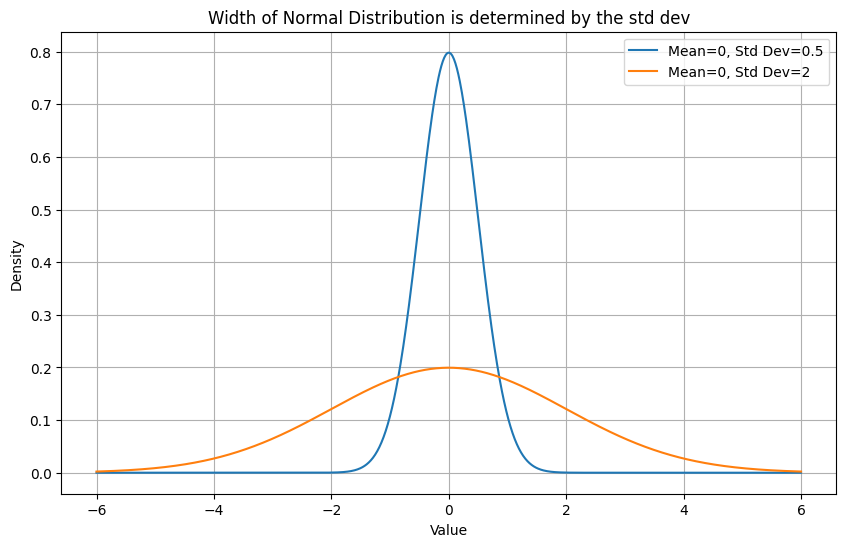

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the first Normal distribution
mean1 = 0
std_dev1 = 0.5

# Parameters for the second Normal distribution
mean2 = 0
std_dev2 = 2

# Generate x-values (covering a reasonable range for both distributions)
x = np.linspace(-6, 6, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values1 = norm.pdf(x, mean1, std_dev1)
pdf_values2 = norm.pdf(x, mean2, std_dev2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values1, label=f'Mean={mean1}, Std Dev={std_dev1}')
plt.plot(x, pdf_values2, label=f'Mean={mean2}, Std Dev={std_dev2}')


# Add labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Width of Normal Distribution is determined by the std dev")
plt.grid(True)
plt.legend() # Add a legend to identify the distributions

# Display the plot
plt.show()

The Normal distribution shows how strongly we believe in our mean. If we are unsure and our observations are scattered, we allow a wider range of values (similar to the orange line), conversely, if all our observations are similar (ie small std dev) we believe our mean is accurate (blue line)

To find the actual probability of a value lying between x1 and x2 we need to integrate the function for these limits.

Normal distributions have a great feature where 68% of the data lies within 1std from the mean, 95% of the data lies between 2std and 99% of the data lies between 3std.

### Catching the plane
Imagine you have booked a vacation to Hawaii and are really excited to take a break from work and just drink beers on the beach. You are wondering how far in advance you should reach the airport so that you can comfortably clear security and board the plane and not have to run through the terminal when the doors are just about to close.   
You try to remember your last 5 airport visits and recall that it took you around 35, 40, 45, 55 and 60 minutes to get through security.  
Your partner assures you that this time it will be different and that you will be done with security within 30 mins and that you should leave accordingly. Afterall, why go early and wait at the terminal!?

You being the overprepared traveller are not so convinced - none of the times up until now took less than 30 mins, what are the chances of it being different this time?

Looking at the data the mean μ =47 and standard deviation σ =9.27  

You now want to know what is the probability, given the data you have observed, that you will be done with security within 30 mins. Since you hate the thought of missing your vacation you want to be 90% sure you’ll make it on time.

Using our previous pdf equation

$$N(\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

To get the probability, we need to integrate this function over all values less than 30
$$ ∫_{-∞}^{30} N(\mu = 47, \sigma = 9.27)$$


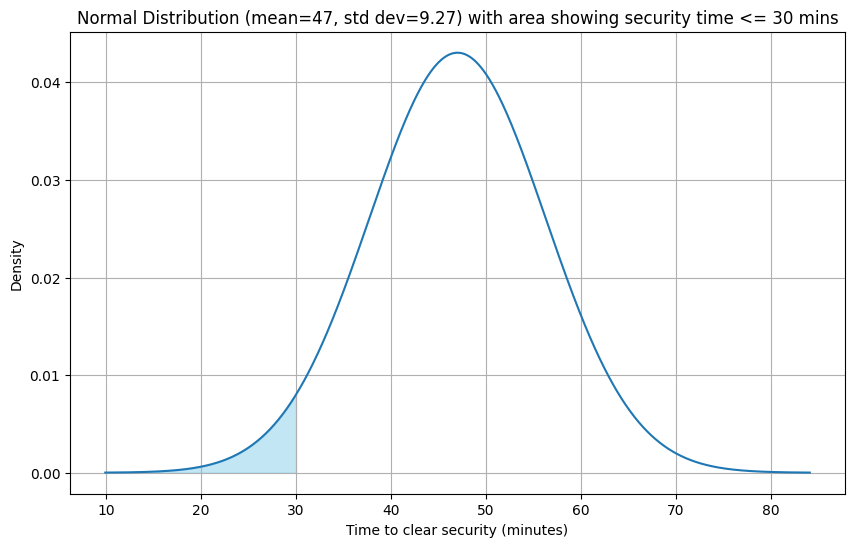

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 47
std_dev = 9.27

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Highlight the area under the curve from -infinity to 30
x_fill = np.linspace(mean - 4 * std_dev, 30, 100)
pdf_fill = norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, pdf_fill, color='skyblue', alpha=0.5)

# Add labels and title
plt.xlabel("Time to clear security (minutes)")
plt.ylabel("Density")
plt.title(f"Normal Distribution (mean={mean}, std dev={std_dev}) with area showing security time <= 30 mins")
plt.grid(True)

# Display the plot
plt.show()

The area of the shaded region represents the probability of getting done with security within 30 mins or less given the observations

You’ll notice that even though none of the observations were less than 30 mins we still see possible values less than 30 mins due to the spread or standard deviation of the distribution.

Calculating the integral we get:

In [ ]:
from scipy.stats import norm

# Parameters for the normal distribution
mean = 47
std_dev = 9.27

# Calculate the integral from -infinity to 30 using the CDF
probability = norm.cdf(30, loc=mean, scale=std_dev)

print(f"The integral of the normal distribution with mean={mean} and std dev={std_dev} from -infinity to 30 is: {probability}")

The integral of the normal distribution with mean=47 and std dev=9.27 from -infinity to 30 is: 0.033336445863857034


We see that P(wait time < 30) = 3.3%, telling us there is only a 3% chance that you will be done with security within 30 mins.   
Since you wanted to be 90% sure that you will make the plane on time you decide that this is not worth the risk and do what you always have done - reach 2 hours before takeoff and sit at the gate doom scrolling.


### Key Takeaways

Normal distributions are great because we can think of a wide range of possibilities when we only know the mean and standard deviation of our data.

For any normal distribution with a known mean and standard deviation, we can estimate the area under the curve around the mean in terms of the standard deviation.
* 68% of all possible values lie within 1 standard dev of the mean
* 95% of all values lie within 2 standard dev of the mean
* 99.7% of all values lie within 3 standard dev of the mean

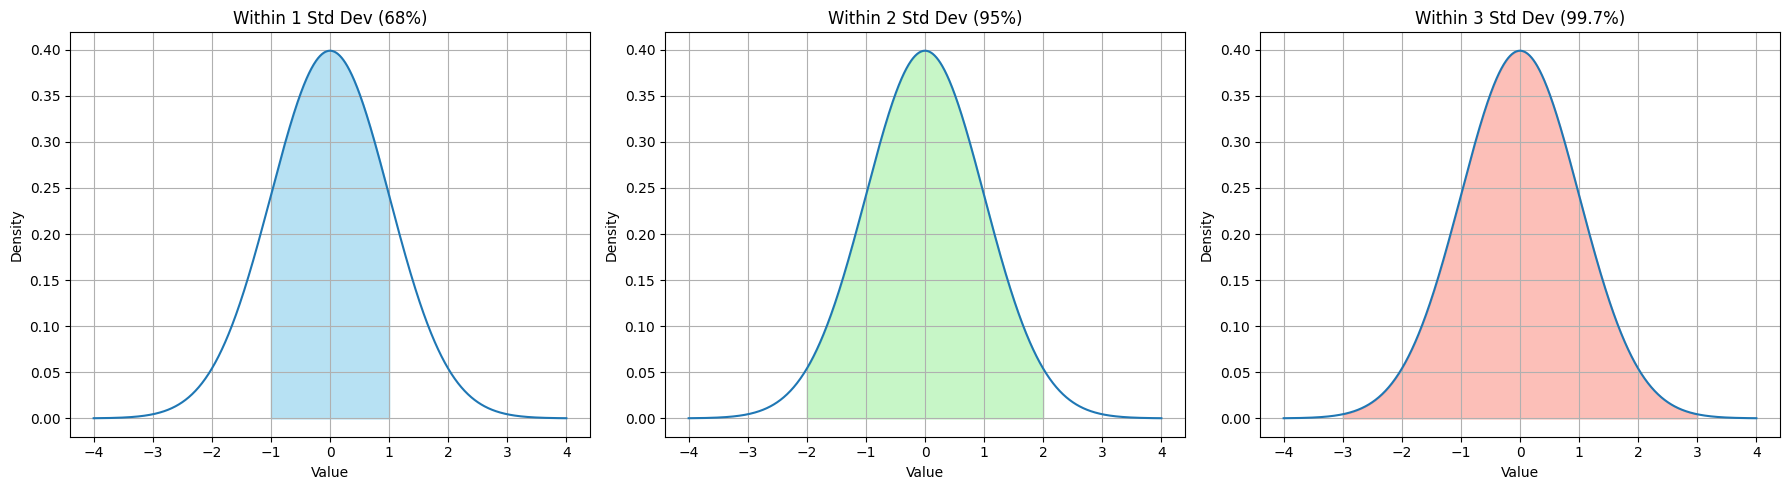

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 0  # Using a standard normal distribution for simplicity
std_dev = 1

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create a figure with three subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Plot for 1 standard deviation
axes[0].plot(x, pdf_values)
x_fill_1std = np.linspace(mean - std_dev, mean + std_dev, 100)
pdf_fill_1std = norm.pdf(x_fill_1std, mean, std_dev)
axes[0].fill_between(x_fill_1std, pdf_fill_1std, color='skyblue', alpha=0.6)
axes[0].set_title('Within 1 Std Dev (68%)')
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Plot for 2 standard deviations
axes[1].plot(x, pdf_values)
x_fill_2std = np.linspace(mean - 2 * std_dev, mean + 2 * std_dev, 100)
pdf_fill_2std = norm.pdf(x_fill_2std, mean, std_dev)
axes[1].fill_between(x_fill_2std, pdf_fill_2std, color='lightgreen', alpha=0.5)
axes[1].set_title('Within 2 Std Dev (95%)')
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Plot for 3 standard deviations
axes[2].plot(x, pdf_values)
x_fill_3std = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
pdf_fill_3std = norm.pdf(x_fill_3std, mean, std_dev)
axes[2].fill_between(x_fill_3std, pdf_fill_3std, color='salmon', alpha=0.5)
axes[2].set_title('Within 3 Std Dev (99.7%)')
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")
axes[2].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()

This is very useful for assessing the likelihood of a value given even very less data.

## Mission Complete: Summary
This chapter was all about getting a solid grip on probability distributions. We started with the basics, like probability mass functions (PMFs), and how they help us understand discrete variables.

* We covered Bernoulli distribution, which is great for single "yes/no" situations
* the Binomial distribution, which handles multiple independent trials with those same two outcomes.
    * We even walked through some real-world examples, from simple coin flips and dice rolls to things like e-commerce conversion rates and predicting stock market movements, showing how these distributions can help us figure out the likelihood of different outcomes.
* We took a look at the Beta distribution. This one's really useful for figuring out the probability of success when you've already seen some results, which is a bit different from how the Binomial distribution focuses on the number of successes.
* Finally we saw the Normal distribution which is super important for modeling continuous data.

By wrapping our heads around these distributions and why they work, we've built a foundation for tackling more advanced statistical modeling.

## Skill Tree Extensions: Recommended Readings
* Bayesian Statistics for Beginners [book](https://a.co/d/0mdF1pj) (Donovan and Mickey)
* Bayesian Statistics the Fun Way [book](https://a.co/d/dLdYfSo) (Will Kurt)
* Doing Bayesian Data Analysis [book](https://a.co/d/7l2mfs1) (John Kruschke)
